# Retail Data Wrangling and Analytics

In [21]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Data from PSQL into DataFrame

**Setup Docker Containers**

![](https://i.imgur.com/VQrBVBk.jpg)

```
#make sure you have both Jupyter and PSQL docker container running
docker ps

#Attach a bridge network to both containers so they can communicate with each other
docker network create jarvis-net
#this command works on running containers
docker network connect jarvis-net jarvis-jupyter
docker network connect jarvis-net jarvis-psql

#verify both containers are attached to the jarvis-net
docker network inspect trading-net

#Note: instead of using `localhost`, you should use container names as hostnames.
```

**Data Preperation**

- Use [pandas.read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html) api to load the PSQL retail table into a Pandas DataFrame

![](https://i.imgur.com/AmkAP63.jpg)

- Get familair with the transaction date with `df.head()`, `df.sample(10)`, `df.info()`, `df.describe()`, etc..



In [3]:
#install psql "driver"
!pip3 install psycopg2-binary

In [8]:
#Write your code in one or more cells (please remove this line from your notebook)
import psycopg2
from sqlalchemy import create_engine

db_params = {
    'host': 'jrvs-psql',  # Container name as the hostname
    'port': 5432,
    'database': 'postgres',
    'user': 'postgres',
    'password': 'password'
}


engine_string = f"postgresql+psycopg2://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['database']}"
engine = create_engine(engine_string)

retail_df = pd.read_sql_table('retail', con=engine)
retail_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [9]:
retail_df.info()
retail_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


,quantity,unit_price,customer_id
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359440e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


# Load CSV into Dataframe
Alternatively, the LGS IT team also dumped the transactional data into a [CSV file](https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv). However, the CSV header (column names) doesn't follow the snakecase or camelcase naming convention (e.g. `Customer ID` instead of `customer_id` or `CustomerID`). As a result, you will need to use Pandas to clean up the data before doing any analytics. In addition, unlike the PSQL scheme, CSV files do not have data types associated. Therefore, you will need to cast/convert certain columns into correct data types (e.g. DateTime, numbers, etc..)

**Data Preperation**

- Read the `data/online_retail_II.csv` file into a DataFrame
- Rename all columns to upper camelcase or snakecase
- Convert/cast all columns to the appropriate data types (e.g. datetime)

In [18]:
retail_df = pd.read_csv('https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv')
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [19]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [43]:
# Rename columns to upper camelcase or snakecase
retail_df.rename(columns={"Customer ID": "CustomerID"}, inplace=True) 

# Convert/cast all columns to the appropriate data types
retail_df = retail_df.astype(
    {'Invoice':'object',
     'StockCode':'object',
     'Description':'object',
     'Quantity':'int64',
     'InvoiceDate':'datetime64',
     'Price':'float64',
     'CustomerID':'float64',
     'Country':'object',
    })

retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


# Total Invoice Amount Distribution

---
**Please remove this insturction cell after you are done with coding**

1. Calculate the invoice amount. Note: an invoice consists of one or more items where each item is a row in the df. (hint: you need to `GROUP BY invoice`)
2. Draw the distribution of invoice amount with min, max, median, mod, and mean. However, you will notice many outlier data (e.g. invoices with large amounts). Sample hist and box charts:

![](https://i.imgur.com/N8hsbDa.jpg)

3. Draw the distribution for the first 85 quantiles of the invoice amount data with min, max, median, mod, and mean.


![](https://i.imgur.com/tJrH1qj.jpg)


---

In [64]:
# Create a copy of the DataFrame to avoid modifying the original DataFrame
inv_amount_df = retail_df[["Invoice","Quantity", "Price"]].copy()

# Calculate the InvoiceAmount by multiplying Quantity and Price
inv_amount_df["InvoiceAmount"] = inv_amount_df["Price"] * inv_amount_df["Quantity"]

# Group by "Invoice" and sum the "InvoiceAmount" for each invoice
inv_df = inv_amount_df[['Invoice', 'InvoiceAmount']][inv_amount_df.InvoiceAmount > 0].groupby('Invoice').sum('InvoiceAmount')

# Display the first 10 rows of the resulting DataFrame
inv_df.head(10)

,InvoiceAmount
Invoice,
489434,505.30
489435,145.80
489436,630.33
489437,310.75
489438,2286.24
489439,426.30
489440,50.40
489441,344.34
489442,382.37


Min: 0.19, Max: 168469.6, Mean: 523.3037611158244, Median: 304.3150000000001, Mode: 0    15.0
dtype: float64


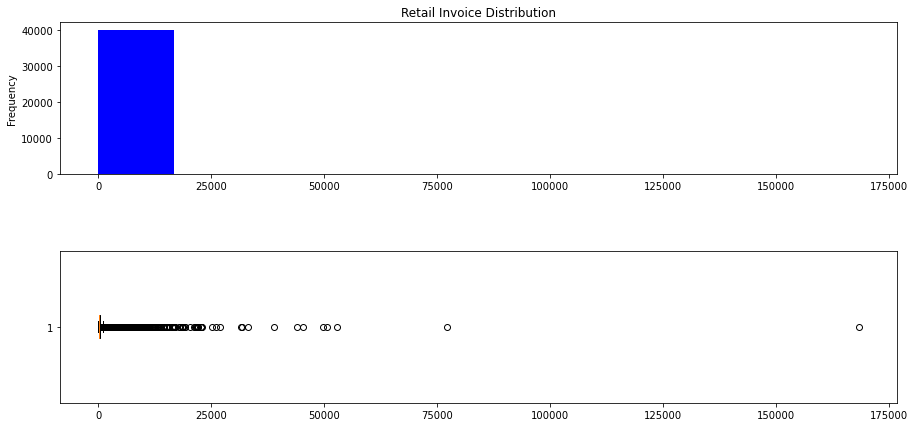

In [85]:
def distribution(retail_data):
    # stats
    min_invoice = retail_data.min()
    max_invoice = retail_data.max()
    mean_invoice = retail_data.mean()
    median_invoice = retail_data.median()
    mode_invoice = retail_data.mode()
    print(f"Min: {retail_data.min()}, Max: {retail_data.max()}, Mean: {retail_data.mean()}, Median: {retail_data.median()}, Mode: {retail_data.mode()}")
    
    
    # Create a subplot with 2 rows
    fig, axs = plt.subplots(2, figsize=(15, 7))

    # Plot histogram
    axs[0].hist(retail_data, color='blue')
#     axs[0].set_xlabel('Invoice Amount')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Retail Invoice Distribution')

    # Plot box plot
    axs[1].boxplot(retail_data, vert=False)
#     axs[1].set_yticklabels(['Invoice Amount'])
#     axs[1].set_xlabel('Value')
#     axs[1].set_title('Box Plot')

    # Manually adjust layout spacing
    plt.subplots_adjust(hspace=0.5)

    # Show the subplot
    plt.show()

distribution(inv_df.InvoiceAmount)

Min: 1.4, Max: 5097.82, Mean: 516.8301176470588, Median: 337.2, Mode: 0        1.40
1        2.10
2        9.75
3       17.00
4       21.95
       ...   
80    1197.80
81    2286.24
82    2454.68
83    2887.14
84    5097.82
Length: 85, dtype: float64


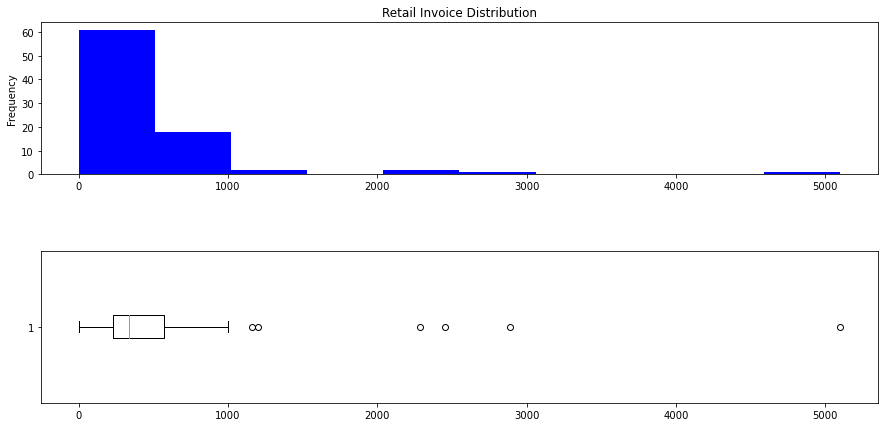

In [86]:
distribution(inv_df.InvoiceAmount.head(85))

# Monthly Placed and Canceled Orders

---
**Please remove this insturction cell after you are done with coding**

- The attribute information (see the `project kick-off` section) contains useful information that helps you to identify canceled orders
- To simplify the problem, you can assume that there are two invoice numbers for each canceled order (one for the original invoice and one for the canceled invoice). Therefore, `# of placed orders = total # of orders - 2 * canceled order`. Furthermore, you can also assume the original invoice and canceled invoice are on always on the same day (this eliminate the case where the original invoice and canceled invoices are on different months)
- hints: you might want to create a new integer column with YYYYMM format. e.g. `2009-12-01 07:45:00 -> 200912` which allows easy GROUP BY.

**Sample Plot:**

![](https://i.imgur.com/tmLsPDf.jpg)

---

In [144]:
#create a new 'YYYYMM'column and insert into the Dataframe.
retail_df2 = retail_df.copy()
retail_df2['YYYYMM'] = retail_df2['InvoiceDate'].dt.strftime('%Y%m').astype(int)
# retail_df2

# Group orders by year and count orders by months
retail_ymonth = retail_df2.groupby('YYYYMM')
retail_ymonth_total = retail_ymonth['Invoice'].count()
# retail_yearmonthl_total

# Calculate total orders placed and canceled by month
ymonth_cancelled = retail_df2[retail_df2['Invoice'].str.startswith('C')].groupby('YYYYMM')['Invoice'].count()
ymonth_placed = retail_ymonth_total - 2 * ymonth_cancelled
# ymonth_placed

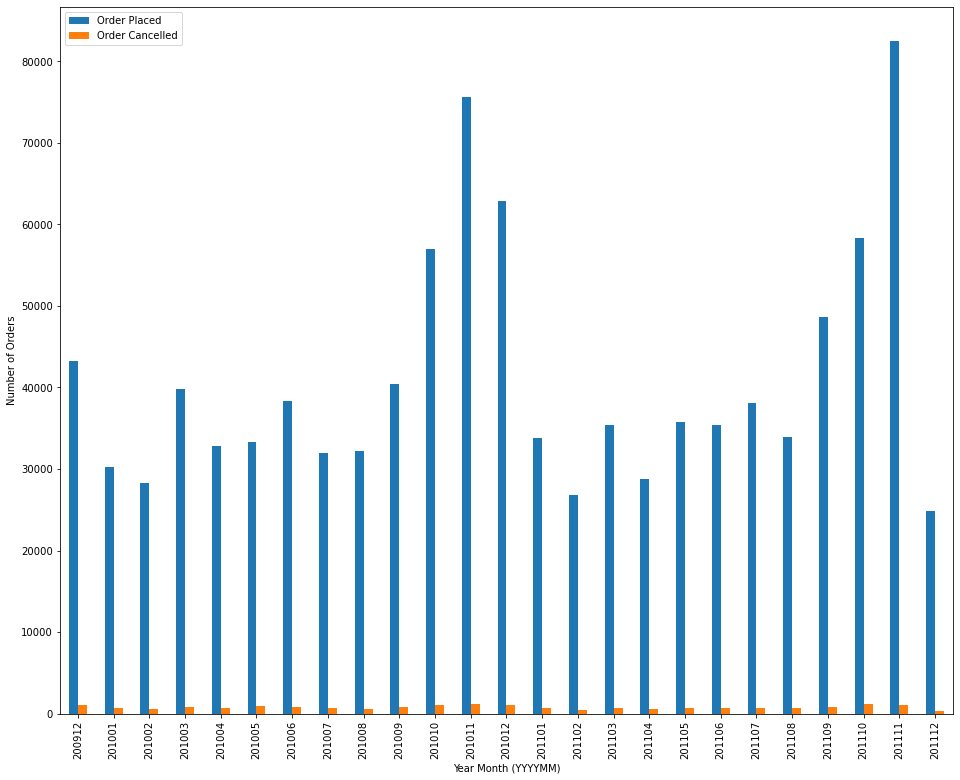

In [148]:
# Plot total orders placed and canceled by month
ymonth_cancelled.rename("Canceled", inplace=True)
ymonth_placed.rename("Placed", inplace=True)

placed_cancelled_df = pd.concat([ymonth_placed.rename('Order Placed'), ymonth_cancelled.rename('Order Cancelled')], axis=1).reset_index()
placed_cancelled_df.plot(x='YYYYMM', y=["Order Placed", "Order Cancelled"], kind="bar", figsize=(16, 13), xlabel="Year Month (YYYYMM)", ylabel="Number of Orders")
plt.show()

# Monthly Sales

---
**Please remove this insturction cell after you are done with coding**


- Calculate the monthly sales data
- Plot a chart to show monthly sales (e.g. x-asix=year_month, y-axis=sales_amount)

![](https://i.imgur.com/k1KOqKO.jpg)

---

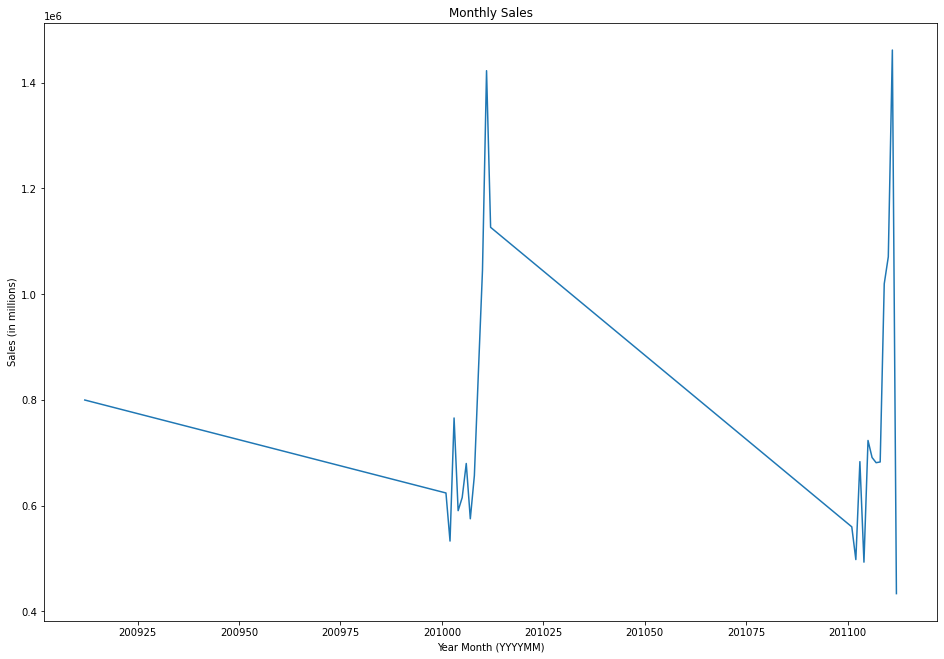

In [174]:
# Calculate the monthly sales data
retail_df2["InvoiceAmount"] = retail_df2["Price"] * retail_df2["Quantity"]
# retail_df2
monthly_sales_df = retail_df2.groupby("YYYYMM")[["InvoiceAmount"]].sum()
# monthly_sales_df

# Plot a chart to show monthly sales 
fig = plt.figure(figsize=(16,11))
plt.ylabel('Sales (in millions)')
plt.xlabel('Year Month (YYYYMM)')
plt.title('Monthly Sales')
plt.plot(monthly_sales_df)
fig.show()

# Monthly Sales Growth


---
**Please remove this insturction cell after you are done with coding**

- Calculate monthly sales percentage growth data
- Plot a chart to show the growth percentage

![](https://i.imgur.com/J3btp8j.jpg)

---

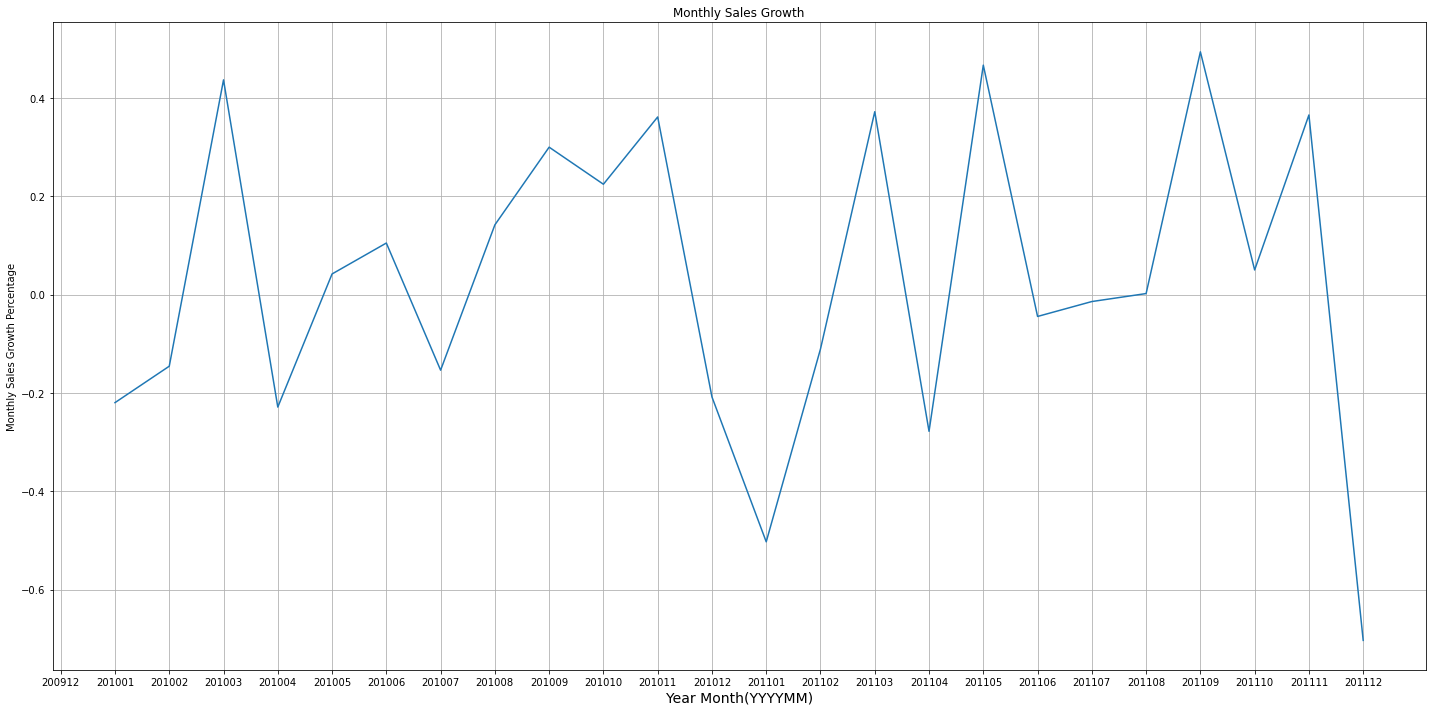

In [206]:
# Calculate monthly sales percentage growth data
monthly_sales_growth_df = monthly_sales_df.copy()
monthly_sales_growth_df = monthly_sales_growth_df.pct_change()
monthly_sales_growth_df

plt.figure(figsize=(20, 10))
plt.plot(monthly_sales_growth_df.index.astype(str), monthly_sales_growth_df["InvoiceAmount"])

plt.title('Monthly Sales Growth')
plt.xlabel('Year Month(YYYYMM)', fontsize=14)
plt.ylabel('Monthly Sales Growth Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly Active Users

---
**Please remove this insturction cell after you are done with coding**

- Compute # of active users (e.g. unique `CusotomerID`) for each month
- Plot a bar chart

![](https://i.imgur.com/eFYp8VF.jpg)

---

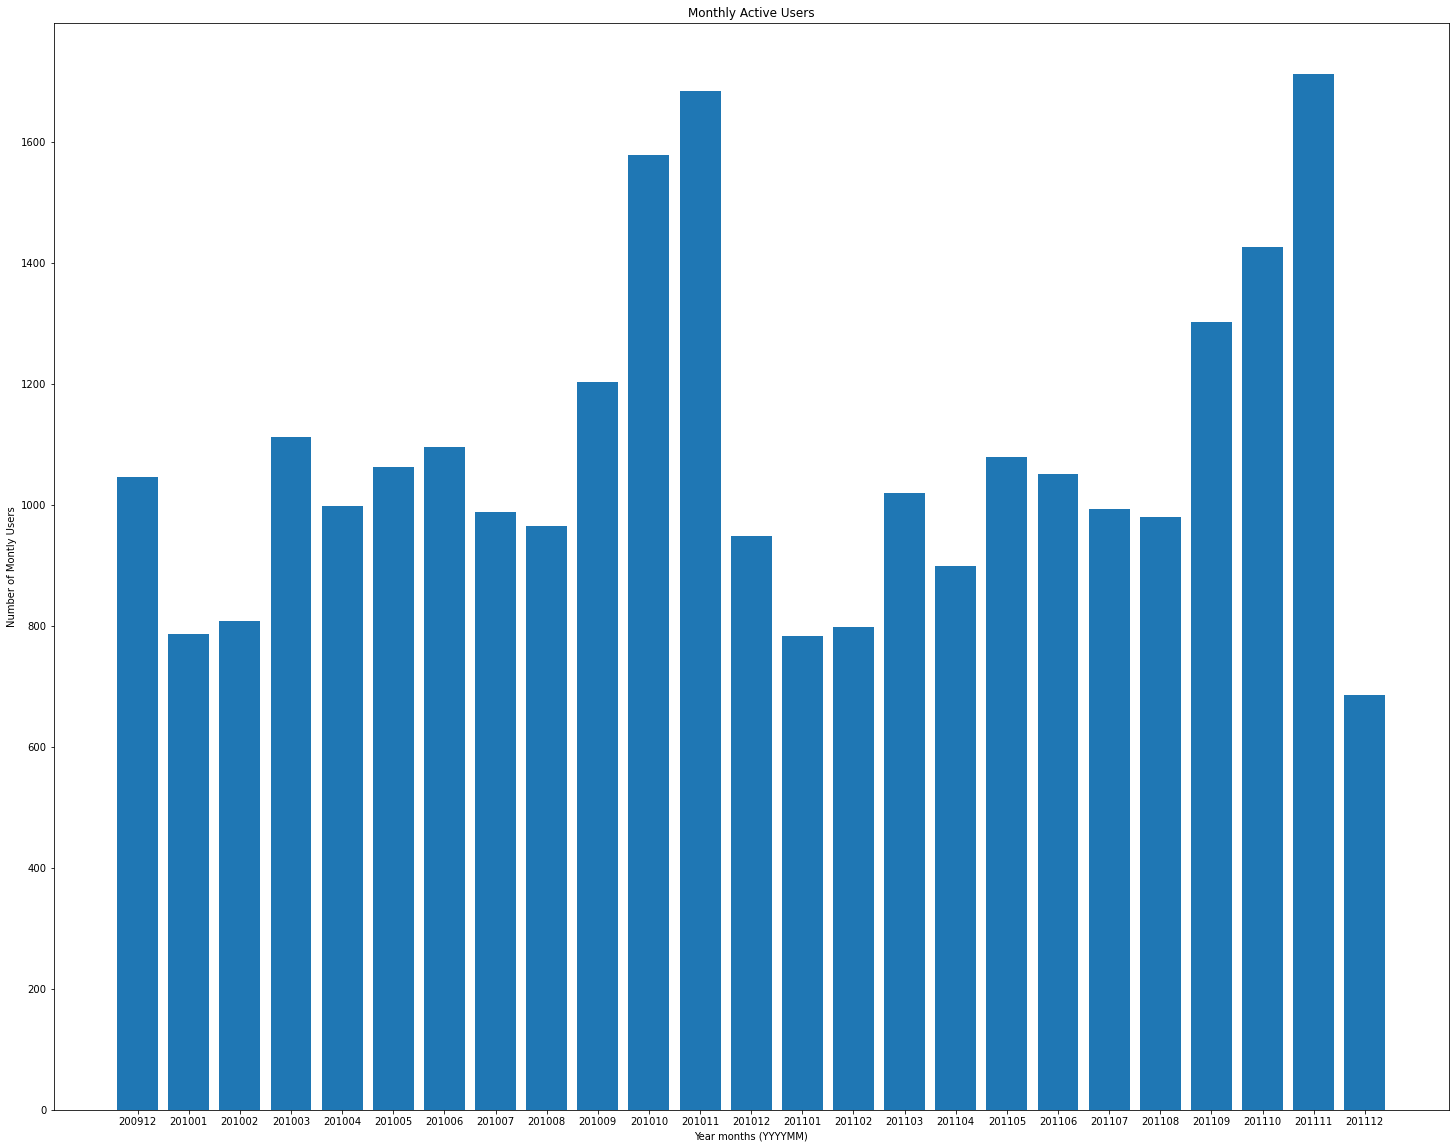

In [221]:
# Compute # of active users (e.g. unique CusotomerID) for each month
monthly_active_users_df = retail_df2.groupby("YYYYMM")[["CustomerID"]].nunique()
# monthly_active_users_df

# Plot a bar chart
plt.figure(figsize=(25, 20))
plt.bar(monthly_active_users_df.index.astype(str), monthly_active_users_df["CustomerID"])
plt.title('Monthly Active Users')
plt.xlabel("Year months (YYYYMM)")
plt.ylabel("Number of Montly Users")
plt.show()

# New and Existing Users



---
**Please remove this insturction cell after you are done with coding**

- Plot a diagram to show new and exiting user for each month.
- A user is identified as a new user when he/she makes the first purchase
- A user is identified as an existing user when he/she made purchases in the past
- hints:
  - find out the first purchase year-month for each user and then join this data with the transactional data to help you identified new/exiting users

![](https://i.imgur.com/nWjnrpr.jpg)

---

In [223]:
# Compute # of active users (e.g. unique CusotomerID) for each month
# monthly_active_users_df = retail_df2.groupby("YYYYMM")[["CustomerID"]].nunique()
# monthly_active_users_df
retail_df2.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,YYYYMM,InvoiceAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0


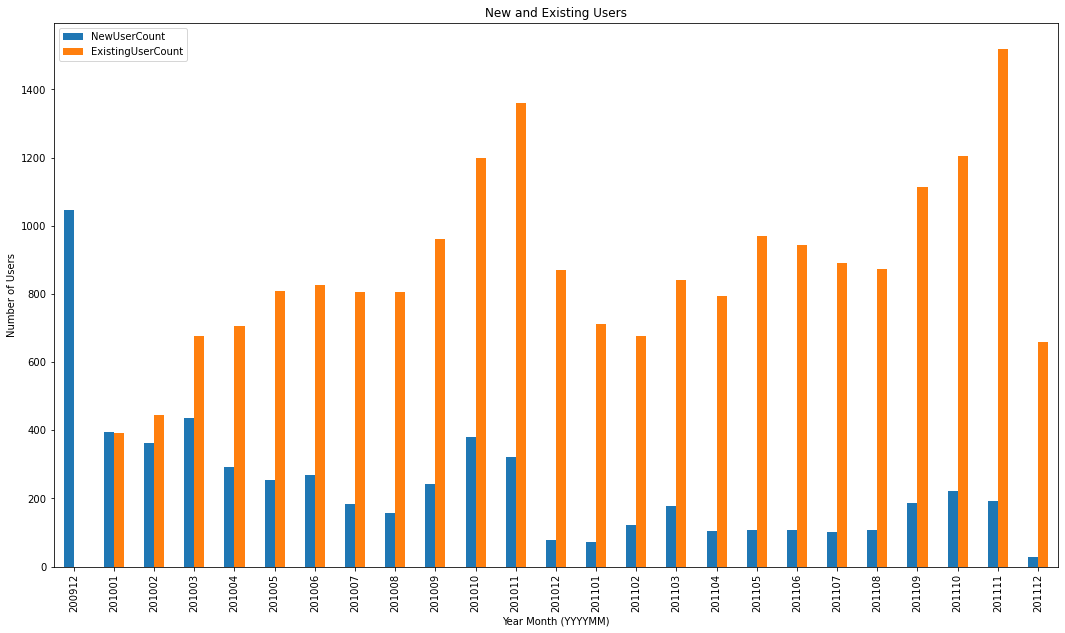

In [234]:
# Find monthly new users and existing users

# Extract the first month of each customer
users_first_month_df = retail_df2.groupby("CustomerID")[["YYYYMM"]].first()
users_first_month_df["NewUserCount"] = users_first_month_df.index

# Calculate counts for new and existing users
users_df = users_first_month_df.groupby("YYYYMM")[["NewUserCount"]].count()
users_df["UserCount"] = retail_df2.groupby("YYYYMM")["CustomerID"].nunique()
users_df["ExistingUserCount"] = users_df["UserCount"] - users_df["NewUserCount"]

# Plot diagram to show new and exiting user for each month
users_df[["NewUserCount", "ExistingUserCount"]].plot(kind='bar', figsize=(18, 10))
plt.title('New and Existing Users')
plt.xlabel("Year Month (YYYYMM)")
plt.ylabel("Number of Users")
plt.show()

## Finding RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in the retail and professional services industries. ([wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research)))

Optional Reading: [Making Your Database Pay Off Using Recency Frequency and Monetary Analysis](http://www.dbmarketing.com/2010/03/making-your-database-pay-off-using-recency-frequency-and-monetary-analysis/)


RFM stands for three dimensions:

- Recency – How recently did the customer purchase?

- Frequency – How often do they purchase?

- Monetary Value – How much do they spend?

Note: To simplify the problem, let's keep all placed and canceled orders.


**Sample RFM table**

![](https://i.imgur.com/sXFIg6u.jpg)

In [257]:
# Group by CustomerID and select the last InvoiceDate for each customer
rfm_df = retail_df.groupby("CustomerID")[["InvoiceDate"]].last()

# Calculate Recency as the number of days between today and the last InvoiceDate
rfm_df["Recency"] =  (pd.Timestamp.today() - rfm_df["InvoiceDate"]).dt.days

# Calculate Frequency as the number of unique invoices for each customer
rfm_df["Frequency"] = retail_df2.groupby("CustomerID")["Invoice"].nunique()

# Calculate MonetaryValue as the sum of InvoiceAmount for each customer
rfm_df["MonetaryValue"] = retail_df2.groupby("CustomerID")["InvoiceAmount"].sum()

# Display the resulting DataFrame with selected columns
print(rfm_df[["Recency","Frequency","MonetaryValue"]])

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0        4751         17         -64.68
12347.0        4428          8        5633.32
12348.0        4501          5        2019.40
12349.0        4444          5        4404.54
12350.0        4736          1         334.40
...             ...        ...            ...
18283.0        4429         22        2736.65
18284.0        4855          2         436.68
18285.0        5086          1         427.00
18286.0        4902          3        1188.43
18287.0        4468          8        4177.89

[5942 rows x 3 columns]


# RFM Segmentation

---
**Please remove this insturction cell after you are done with coding**
RFM segmentation categorizes your customers into different segments, according to their interactions with your website, which will allow you to subsequently approach these groups in the most effective way. In this article, we will show you how to make an RFM segmentation based on an RFM score combining all three RFM parameters together and allowing you to divide your customers into 11 different segments. 

- [RFM Segmentation business cases](https://docs.exponea.com/docs/rfm-segmentation-business-use)

- [RFM Segmentation Guide](https://docs.exponea.com/docs/rfm-segmentation-business-use)

As you can see, computing RFM segmentation requires extensive domain knowledge in marketing which is out of the scope in this project. In practice, you will work with BA/DA to figure out how to compute RFM segments. To simplify this project, a [sample RFM segmentation Notebook](https://github.com/jarviscanada/jarvis_data_eng_demo/blob/feature/data/python_data_wrangling/ipynb/customer-segmentation-with-rfm-score.ipynb) is provided. You are responsible to understand everything from that Notebook and then integrate it into yours. 

- Download the [sample notebook](https://github.com/jarviscanada/jarvis_data_eng_demo/blob/feature/data/python_data_wrangling/ipynb/customer-segmentation-with-rfm-score.ipynb) and import to your Jupyter Notebook or VSCode
- Run the notebook and understand all cells
- Read the remark section at the end of the notebook. You will need this information when writing the README file
- Integrate the RFM segmentation calculation into your notebook

---

In [264]:
#RFM score values 
# rfm_df
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'],5,labels=[5,4,3,2,1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['MonetaryValue'],5,labels=[1,2,3,4,5])

#calculation of the RFM score
rfm_df["RFM_SCORE"] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)
rfm_df.head()

,InvoiceDate,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,,
12346.0,2011-01-18 10:17:00,4751,17,-64.68,2,5,1,251
12347.0,2011-12-07 15:52:00,4428,8,5633.32,5,4,5,545
12348.0,2011-09-25 13:13:00,4501,5,2019.40,3,3,4,334
12349.0,2011-11-21 09:51:00,4444,5,4404.54,5,3,5,535
12350.0,2011-02-02 16:01:00,4736,1,334.40,2,1,2,212


In [277]:
#segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

#creation of segment variable
rfm_df['Segment'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str)

# Replace segment codes with segment names using seg_map
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)


# Summarize the results using mean and count for each segment
result_summary = rfm_df[["Segment", "Recency", "Frequency", "MonetaryValue"]].groupby("Segment").agg(["mean", "count"])
result_summary


Recency        Frequency       MonetaryValue      
                            mean count       mean count          mean count
Segment                                                                    
About to Sleep       4533.689474   380   1.460526   380    492.810900   380
At Risk              4802.094415   752   4.672872   752   1157.449162   752
Can't Lose           4747.305882    85  17.717647    85   5725.638494    85
Champions            4433.512850   856  23.532710   856  10510.937634   856
Hibernating          4891.237785  1535   1.336808  1535    340.030536  1535
Loyal Customers      4493.149565  1150  11.941739  1150   3966.024762  1150
Need Attention       4539.395604   273   3.673993   273   1099.877403   273
New Customers        4435.814815    54   1.000000    54    362.463148    54
Potential Loyalists  4450.674764   741   2.967611   741    899.359865   741
Promising            4463.758621   116   1.000000   116    322.758966   116